---

# 1. Initial Data Preparation

We will use the yfinance package to retrieve price history data for the following stock market indices and stocks:
- SPY
- AGG
- F
- GM
- UBER
- TSLA
- GOOG
- SNAP
- VOW3.DE
- EXSA.DE
- EURUSD=X
- GD=F


Additionally, we would like you to add to the list 4 more tickers, consisting of:
- Any **2** tickers for companies domiciled in Europe, and priced in EUR
- Any **2** tickers for companies domiciled in the US, and priced in USD


The time period for our analysis will be from **Dec 31, 2015 to Dec 31, 2021**

## Prompt 1: Retrieving and caching data

Using the [yfinance documentation](https://github.com/ranaroussi/yfinance) as a guide, please retrieve historical data from Yahoo Finance for the 16 instruments listed above.  Please save the raw data download (without any data cleaning or processing) as a `pickle` in your project directory.  Please use the pickled pandas object as a cache for the rest of the project and re-load the data you require from the pickle, if necessary.

### Retrieve data from yfinance

#### Two tickers for companies domiciled in Europe: BNP.PA, MBG.DE
#### Two tickers for companies selected domiciled in the US: MA and MCD

In [522]:
import yfinance as yf
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
import math
from math import sqrt
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format

In [517]:
tickers = ["SPY", "AGG", "F", "GM", "UBER",
           "TSLA", "GOOG", "SNAP", "VOW3.DE", "EXSA.DE", 
           "MA", "MCD", "BNP.PA", "MBG.DE", "EURUSD=X", "GD=F"]

data = yf.download(tickers,start="2015-12-31", end="2022-01-01")

[*********************100%***********************]  16 of 16 completed


#### Store raw data as pickle

In [518]:
data.to_pickle('raw_data.pickle')

## Prompt 2: Data wrangling

### Data clean-up

Please realign the data index as a daily data-series and please extract just the "Adj Close" data; i.e. the reshaped dataframe should have dates (without time) as its index and tickers (e.g. `SPY`, `GD=F`) as its columns.  In either a markdown box or in comments, please note any assumptions or adjustments you may have made.  Please export this data to a `.csv` file in your project directory.

In [519]:
# Convert pickle to dataframe
df2 = pd.read_pickle('raw_data.pickle')

# Extract only Adj Close
df2 = df2["Adj Close"]

# Keep only one datetime per day 
cleaned_day = df2.resample('1D').mean()

# Remove timestamp
cleaned_day.index = cleaned_day.index.date
cleaned_day.index.name = 'Date'

# Convert cleaned data to csv format
cleaned_day.to_csv('cleaned_day.csv')

#### Due to time difference, the trading days in US and Europe has one day lag; will shift all European stocks by 1 to ensure consistency

### File manipulation

Next, in a separate `.py` file, please write a function to read the `.csv` file saved in the last section, and generate some descriptive statistics.  Please compute at least: minimum, maximum, and mean Adj Close as well as total return over the entire data period; please feel free to compute and show a few (2 or 3) additional statistics as well if you would like to fill out the table.


Specifically, the function should accept as input:
  ```
  filepath: str and/or Path
    File path to a .csv data with time-series data
  ```


and returns:
  ```
  Pandas dataframe of descriptive statistics; the index should be tickers, matching the columns in the input csv file, and the columns should be appropriate labels for the descriptive statistics you are tabulating 
  ```
  
Please specify the filename of the `.py` file you have written:

In [520]:
import sys
sys.path.append('/Users/zhengmoxuan/Desktop/Case/')
# specify the filename of the .py file
import Stats

Please import the function you have just written, pass the `.csv` file you generated earlier on to it, and display the results.

In [523]:
filepath = '/Users/zhengmoxuan/Desktop/Case/cleaned_day.csv'
Stats.get_stats(filepath)

,count,mean,std,min,25%,50%,75%,max,Total Return
AGG,"1,512.0000",102.5348,7.4609,92.1100,96.0439,97.9987,111.4104,114.7890,0.2185
BNP.PA,"1,538.0000",38.0887,7.7850,19.5186,31.9064,38.3656,44.3128,57.0368,0.7319
EURUSD=X,"1,564.0000",1.1438,0.0459,1.0390,1.1116,1.1362,1.1795,1.2510,0.0358
EXSA.DE,"1,521.0000",38.0992,3.7460,27.4550,35.6000,37.7450,39.1700,48.6050,0.3517
F,"1,512.0000",9.6428,2.5550,3.9043,8.5110,9.3599,10.1846,20.9899,0.9455
GD=F,"1,331.0000",415.5570,67.1716,245.9000,372.7250,406.9500,453.5550,597.2000,0.7984
GM,"1,512.0000",36.2189,10.0730,16.7617,29.7571,34.3430,38.4896,64.4628,1.0674
GOOG,"1,512.0000",66.3310,30.1383,33.4130,46.4759,56.9653,73.8490,150.7090,2.8130
MA,"1,512.0000",219.2865,96.4725,77.4466,120.9453,208.8334,309.6458,392.3867,2.8286
MBG.DE,"1,522.0000",48.2188,11.1517,18.6900,41.6445,46.0090,52.3319,84.1913,0.2360


---

# 2. Bollinger Bands Analysis

A Bollinger Band is an analytical tool used to study the prices of financial instruments.  Please refer to this [Investopedia article](https://www.investopedia.com/terms/b/bollingerbands.asp) as well as this [Wikipedia article](https://en.wikipedia.org/wiki/Bollinger_Bands), for example, for some common explanations for the definition and interpretation of this analysis.


In this section, we will adapt the definition of the Bollinger Band slightly to fit the data we have.  Specifically, let
\begin{align}
P_t &= \mbox{Adj Close on trading day }\ t, \\
MA\ (k)_t &= \mbox{Moving Average of }\ P_t \mbox{ over the previous }\ k \mbox{ trading days}, \\
\sigma\ (k)_t &= \mbox{Standard Deviation of }\ P_t \mbox{ over the previous }\ k \mbox{ trading days} \\
\end{align}


The $Bollinger\ (k,N)$ series for a financial instrument consists of 4 data series,
\begin{align}
P_t&, \\
MA\ (k)_t&, \\
UB\ (k,N) &= MA\ (k)_t + N*\sigma\ (k)_t, \\
\mbox{and }\ LB\ (k,N) &= MA\ (k)_t - N*\sigma\ (k)_t \\
\end{align}

## Prompt 3: Calculating Bollinger Bands


### 3.1 Calculate the $Bollinger\ (20,2)$ series for `SPY`, and display the results graphically.

In [438]:
# retrieve prices for SPY only, could change to other tickers here for reuse purpose
selected_ticker = "SPY"
prices_SPY = cleaned_day[selected_ticker].dropna()

# Write a function for Bollinger Bands
def get_bollinger_bands(k,N,df):
    
    ma = df.rolling(k).mean() # Calculate moving averages
    std = df.rolling(k).std() # Calculate standard deviation
    upper = ma + std * N # Calculate top band
    lower = ma - std * N # Calculate bottom band
    results = pd.concat([ma,upper,lower,df],axis=1)
    results.columns = ['Moving Averages', 'Bollinger Upper Bound','Bollinger Lower Down', 'Historical Prices']
    return results

<AxesSubplot:xlabel='Date'>

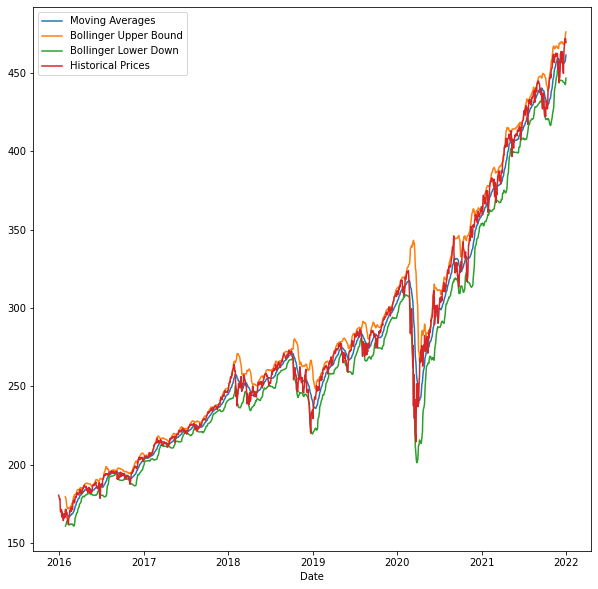

In [439]:
get_bollinger_bands(20,2,prices_SPY).plot(figsize=(10, 10))

Please calculate 2 more data series, the $Bollinger\ (60,1.5)$ series for the `SPY`, and the $Bollinger\ (k,N)$ series for the `SPY` for a different pair of any $(k,N)$ of your choice. Please visualise your findings, and referring to those graphs, provide some brief written comments on the following questions:
- Pease describe the relationship between the parameters $(k,N)$ and the analytical results
- What statistical attributes for any given price time-series would potentially make the Bollinger Bands less and more useful as the basis for a trading strategy?


**Please be prepared to discuss these results and comments further**.

<AxesSubplot:xlabel='Date'>

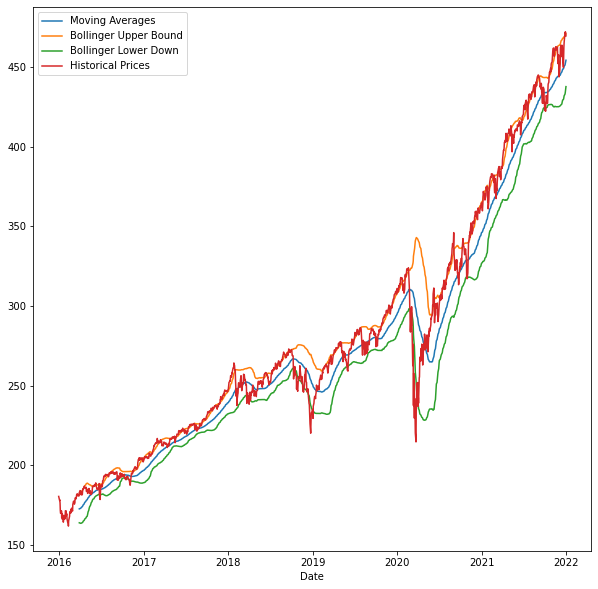

In [440]:
get_bollinger_bands(60,1.5,prices_SPY).plot(figsize=(10, 10))

<AxesSubplot:xlabel='Date'>

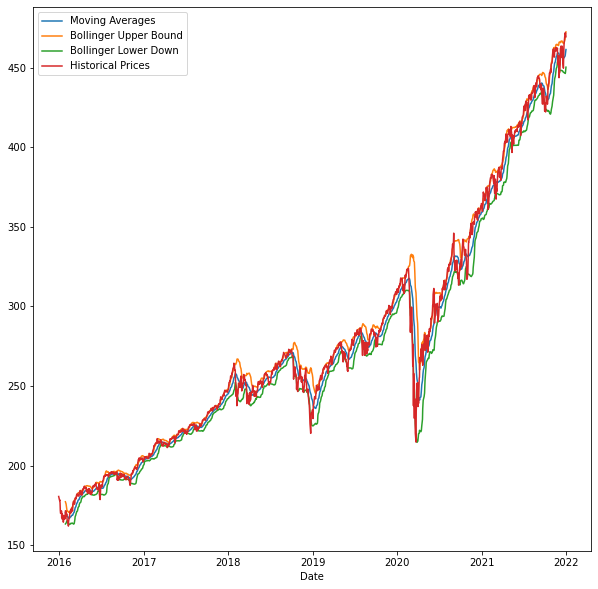

In [441]:
get_bollinger_bands(20,1.5,prices_SPY).plot(figsize=(10, 10))

<AxesSubplot:xlabel='Date'>

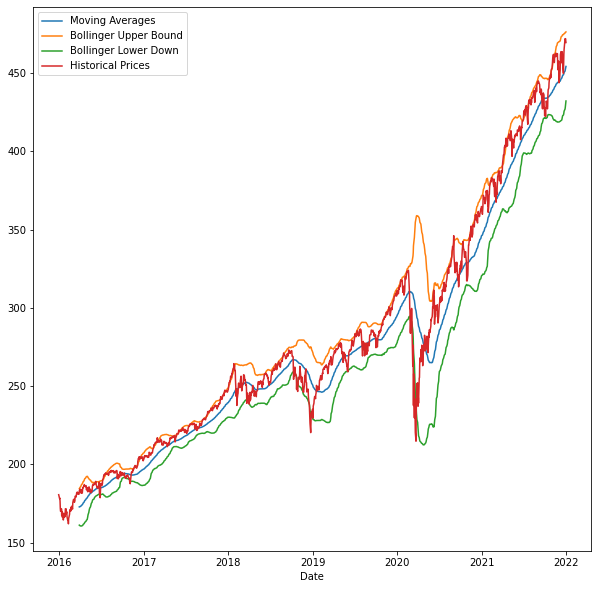

In [442]:
get_bollinger_bands(60,2,prices_SPY).plot(figsize=(10, 10))

#### Larger k and N tends to generate a wider band

#### Skewness and kurtosis of stock prices may potentially affect the effectiveness of the Bollinger Band; the band may be more useful when prices are normally distributed

## Prompt 4: Extending the analysis
One way to think about how useful a particular $Bollinger\ (k,N)$ series may be as a trading signal is to consider how often the price series stays within $UB\ (k,N)$ and $LB\ (k,N)$.  Please propose a calculation and simple algorithm to capture this statistic, which we can denote as $W\ (k,N) = \mbox{Percentage of of the data series }P_t,\ such\ that\ LB\ (k,N) < P_t < UB\ (k,N)$.  Then, please choose **any 4 distinct pairs of $(k,N)$ as well as the pair $(20,2)$** (i.e. 5 pairs), and compute the corresponding $W\ (k,N)$ for `SPY` and present them in a table.

### 4.1 Get percentage for 5 pairs

In [526]:
def W(k,N,df):
    
    ma = df.rolling(k).mean() # Calculate moving averages
    std = df.rolling(k).std() # Calculate standard deviation
    upper = ma + std * N # Calculate top band
    lower = ma - std * N # Calculate bottom band 
    
    # count number of times price fall into the band
    count = 0
    for i in range(len(df)):
        if df[i] < upper[i] and df[i] > lower[i]:
            count+= 1
    # Calculate percentage:
    percent = count / len(df)
    return '{:.2%}'.format(percent)  

In [527]:
# Make a table
pairs = [W(20,2, prices_SPY), W(60,2,prices_SPY), W(20,1.5, prices_SPY),
         W(60,1.5,prices_SPY), W(30,2,prices_SPY)]
pairs_df = pd.DataFrame(pairs).T
pairs_df.columns = ['W(20,2)', 'W(60,2)', 'W(20,1.5)', 'W(60,1.5)', 'W(30,2)']
pairs_df.index = [selected_ticker]
pairs_df

,"W(20,2)","W(60,2)","W(20,1.5)","W(60,1.5)","W(30,2)"
SPY,90.08%,83.80%,66.07%,56.08%,88.43%


### 4.2 Get Percentage of all tickers

Cross tabulate $W\ (k,N)$ for those same 5 pairs of $(k,N)$ for all 16 tickers we have used for this exercise, and provide some brief written comments to address the following questions:
- Qualitatively describe how you would design an algorithm to arrive at the optimal $W\ (k,N)$
- Qualitatively propose other metrics that you may use to evaluate how useful any particular $Bollinger\ (k,N)$ series is


**Please be prepared to discuss these results and comments further**.

In [528]:
# Create a list of columns of 16 tickers for iterations later
temp = []
for i in cleaned_day.columns:    
    temp.append(cleaned_day[i].dropna())

# Create empty lists to store values
results1 = []
results2 = []
results3 = []
results4 = []
results5 = []
# loop through different combinations
for i in temp:
    results1.append(W(20,2,i))
    results2.append(W(60,2,i))
    results3.append(W(20,1.5,i))
    results4.append(W(60,1.5,i))
    results5.append(W(30,2,i))

In [529]:
# Gather results together
percentage_all_tickers = pd.DataFrame(list(zip(results1, results2, results3, results4, results5)), 
                                columns=pairs_df.columns)

percentage_all_tickers.index = cleaned_day.columns
percentage_all_tickers

,"W(20,2)","W(60,2)","W(20,1.5)","W(60,1.5)","W(30,2)"
AGG,88.69%,80.22%,70.70%,61.11%,85.85%
BNP.PA,88.36%,83.49%,70.81%,65.15%,86.54%
EURUSD=X,88.62%,82.48%,73.21%,67.52%,87.08%
EXSA.DE,88.23%,84.68%,71.27%,65.68%,87.71%
F,87.83%,79.43%,72.49%,65.67%,85.45%
GD=F,89.03%,82.34%,69.20%,60.63%,87.98%
GM,88.29%,83.07%,70.17%,68.12%,86.64%
GOOG,87.90%,83.20%,69.38%,61.57%,86.57%
MA,89.15%,81.48%,70.90%,59.46%,87.17%
MBG.DE,87.52%,82.06%,70.11%,61.24%,85.55%


### 4.3 Qualitatively describe how you would design an algorithm to arrive at the optimal  𝑊 (𝑘,𝑁)

Step1: Define optimal W(K,N) as the percentage that maximizes profit while minimizing times of transactions

Step2: specify the range of k to be [15, 90], increment by 5 days; specify the range of N to be [1,3], increment by 0.2

Step3: set initial buy and sell signal to 0; loop through different k and N values; if price > UB, sell signal +1, if price < LB, buy signal +1; Collect percentage results and counts of trades by calling W(k,N) function

Step4: Backtest profit and loss of each trade, find the corresponding W(k,N) value

### 4.4 Qualitatively propose other metrics that you may use to evaluate how useful any particular  𝐵𝑜𝑙𝑙𝑖𝑛𝑔𝑒𝑟 (𝑘,𝑁)  series is

#### Distance between price and upper/lower bound; a narrowing distance indicates lower volatility. May use this to backtest some options strategies

---

# 3. Statistical attributes of financial data series

Often, it can be useful to transform price series into return series (and in fact, the vast majority of academic literature addressing financial instruments is written based on returns series analysis). In this section, we will transform the data we have and perform some simple statistical exercises and take some first steps towards thinking about portfolio construction.

## Prompt 5: Computing daily returns series



We want to make sure that we are measuring returns for all the tickers on the same currency basis.  Specifically, `VOW3.DE`, `EXSA.DE`, and the two European tickers that you have chosen have price series denominated in `EUR$` Fortunately for us, we have the `EURUSD=F` ticker, which gives us the `EUR`-to-`USD` exchange rate each day (i.e. the Adj Close for `EURUSD=F` tells you how many `USD$` `EUR$1.00` will buy that day).  Please compute a new dataframe, `Adj USD Close`, which is the `Adj Close` dataframe denominated in `USD$`.

### 5.1 Get Close Price

In [530]:
# Convert to USD 
EUR_Stocks = ["VOW3.DE", "EXSA.DE", "BNP.PA", "MBG.DE"]
Adj_USD_Closed = cleaned_day[EUR_Stocks].shift(1).multiply(cleaned_day["EURUSD=X"],axis="index")

# Combine result with the other tickers
usd = ["SPY", "AGG", "F", "GM", "UBER",
        "TSLA", "GOOG", "SNAP", "MA", "MCD", "EURUSD=X", "GD=F"]
temp = cleaned_day[usd]

# Join two dataframes
Adj_USD_Close = pd.concat([Adj_USD_Closed, temp], axis=1).reindex(Adj_USD_Closed.index)

### 5.2 Generate Descriptive Statistics

Please generate a dataframe, `Ret`, for the daily returns for all 16 tickers in our new `Adj USD Close` dataset (where, to be specific, $Ret_t=\frac{P_t}{P_{t-1}}-1$), and please tabulate the following descriptive statistics for each ticker:
- Annualised return
- Annualised standard deviation of daily returns

Please feel free to add a few more (no more than 3) statistics that you think may be interesting.

In [531]:
# Calculate daily returns of Adj USD Close
Ret = Adj_USD_Close.pct_change()

# Calculate annualized return of Adj USD Close
trading_days = 252
annualized_simple_return = Ret.mean() * trading_days

# Calculate annualized standard deviation of Adj USD Close
annualized_sd = Ret.std() * sqrt(trading_days)

# Calculate Sharpe Ratio
# Let risk free rate equals to 10 year treasury rate
risk_free_rate = 0.039
sharpe_ratio = (annualized_simple_return - risk_free_rate)/annualized_sd

summary = pd.concat([annualized_simple_return, annualized_sd, sharpe_ratio], axis=1)
summary.columns = ["Annualized Simple Return","Annualized Std","Sharpe Ratio"]
summary

,Annualized Simple Return,Annualized Std,Sharpe Ratio
VOW3.DE,0.1046,0.3003,0.2186
EXSA.DE,0.0525,0.1573,0.0859
BNP.PA,0.1124,0.2960,0.2482
MBG.DE,0.0691,0.2811,0.1072
SPY,0.1211,0.1497,0.5489
AGG,0.0234,0.0367,-0.4249
F,0.1188,0.2923,0.2730
GM,0.1290,0.3018,0.2982
UBER,0.1183,0.4886,0.1624
TSLA,0.4686,0.4764,0.9018


#### SNAP is the most volatile stock among all 16 assets; TSLA has the highest annualized return and the highest sharpe ratio

## Prompt 6: Describing relationships between returns series


One useful way to think about the relationship between financial instruments is to analyse the correlation between their daily returns series.  Please compute the correlation matrix for the full data-series in the `Ret` dataframe and tabulate it.

### 6.1 Plot Correlation Matrix

<AxesSubplot:>

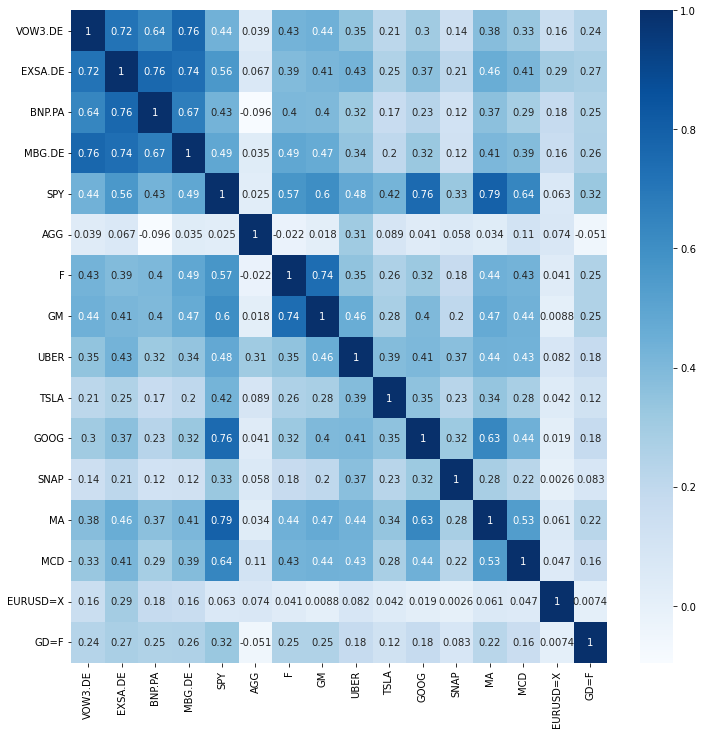

In [533]:
corr = Ret.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap="Blues", annot=True)

#### Similar industries (F & GM), larger weightings (BNP,PA & EXSA.DE) tend to result in higher correlation
#### There are no strong negative correlations between different markets/assets

### 6.2 Select 4 Tickers

If you could have only picked 4 ticker out of the 16 to hold in an investment portfolio, in equal weight, over the period of the data, which 4 tickers would likely result in a portfolio with lowest volatility (i.e. lower standard deviation of daily returns)?  _Although we intend to discuss this question mostly from a qualitative perspective, please feel free to substantiate your comments with further quantitative analysis, including graphs and tables, if you feel it would be helpful._

In [532]:
num_tickers = 4
summary.sort_values(by = ['Annualized Std']).head(num_tickers)

,Annualized Simple Return,Annualized Std,Sharpe Ratio
AGG,0.0234,0.0367,-0.4249
EURUSD=X,0.0057,0.0584,-0.5698
SPY,0.1211,0.1497,0.5489
EXSA.DE,0.0525,0.1573,0.0859


#### Intuitively, 4 tickers with the lowest annualized standard deviation will result in the lowest volatility of the portfolio

#### Tickers selected are: AGG, EURUSD, SPY, EXSA.DE

### 6.3 Plot Rolling Correlation

We can sometimes study the correlations characteristics of a particular ticker, say for instance for a new company we are interesting in analysing, to make some 
simplifying high-level assumptions.  Please graph the rolling 6-month correlations of `TSLA` to `F`, `GM`, `GOOG`, and `SNAP`, and provide brief written comments to addres the following question:
- Given that `F` and `GM` are car manufacturing companies while `GOOG` and `SNAP` are technology services companies, what industry would you think `TSLA` falls into (it does not have to be either of the two industries spanned by the other 4 tickers), and why?


**Please be prepared to discuss these results and comments further**.

In [242]:
# Define a function for rolling correlation
def get_rolling_corr(new_company, months, benchmark_company):
    return Ret[new_company].rolling(30 * months).corr(Ret[benchmark_company])

Text(0, 0.5, 'Correlation')

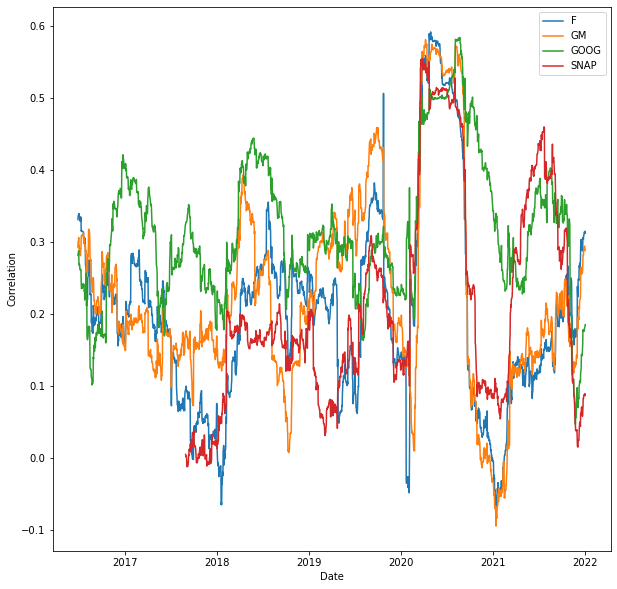

In [402]:
companies = ["F", "GM", "GOOG", "SNAP"] # Specify inputs here

# Gather correlations of different tickers in a list
corr_list = []
for i in companies:
    corr_list.append(get_rolling_corr("TSLA", 6, i)) # Specify inputs here

# Convert list to dataframe
corr_df = pd.DataFrame(corr_list).T
corr_df.columns = companies

# Make a plot
corr_df.plot(figsize=(10,10))
plt.ylabel('Correlation')

#### The correlation of TSLA return with the two industries is not stationary: Initially it behaves like a manufacturing company, then it behaved like tech company for over four years; But starting late 2021, the pattern reversed and it has a higher correlation with manufacturing companies

### Calculate alpha and beta

We can also use construct linear regression models to analyse the performance characteristics of returns series.  For example, given that the `SPY` represents (very approximately) the performance of market for Large Cap US companies, if we think that the performance of `UBER` can be described as some function of the return of the broader markets, an idiosyncratic component, plus some noise, we can construct a linear relationship between `SPY` and `UBER` specified by

$$Ret_{UBER} = \alpha + \beta * Ret_{SPY} + \epsilon$$

Using whatever method you feel most comfortable with, please perform a linear regression analysis on this hypothesized relationship using the full period of available data, tabulating your full results below.  **While we do not have specific prompts for written comments, please be prepared to briefly discuss the results of the linear regression analysis, including your methods**.

In [534]:
def lin_reg(stock, market):
    y = Ret[[stock]].dropna()
    X = Ret[[market]].dropna().tail(len(y)) # Extract same data length

# Fit linear regression model
    reg = LinearRegression().fit(X, y)

# alpha being the intercept while beta being the coefficient
    alpha = reg.intercept_
    beta = reg.coef_
# Tabulate result
    df = pd.DataFrame({"Alpha": alpha.flatten(), "Beta": beta.flatten()})  
    return df

# Can be reused in analyzing any stocks
lin_reg("UBER", "SPY")

,Alpha,Beta
0,-0.0003,1.2309


#### Alpha is slightly negative -> Uber has no excess return
#### Beta is greater than one -> Uber is more volatile than the market